In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from  scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.stats import pearsonr, spearmanr
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import matplotlib.cm as cm

In [2]:
pwd()

'/Users/ritesh/Desktop/Multi_axis-Plasticity-Github-main'

## Preprocessing

In [3]:
exp_data = pd.read_csv('RACIPE_output/a_new_network_solution.dat', sep='\t', header=None)
exp_data.columns = ["Model_Number", "Number_of_Steady_States", "Runs_that_converged_to_steady_state", 
                    "OCT4", "miR145", "AMPK", "HIF1", "miR200", "mtROS", "noxROS", "SNAIL", "ZEB", 
                    "BACH1","RKIP", "SLUG", "CDH1", "Nrf2", "ERa36", "ERa66", "Gata3", "let7", "PD_L1",
                    "Pgr", "Foxa1", "LIN28", "miR34", "np63"]
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,ERa36,ERa66,Gata3,let7,PD_L1,Pgr,Foxa1,LIN28,miR34,np63
0,1,6,57,-4.247256,1.223306,-9.213723,-10.481431,-5.145673,-5.403197,-5.048925,...,7.013079,-19.738626,-3.342506,-18.165797,-6.050346,-15.302690,1.358031,7.184268,-2.358317,-1.202819
1,1,6,12,2.634096,-3.614416,-9.213724,-10.489682,-7.990507,-5.403197,-5.048944,...,7.013073,-14.297125,-3.340829,-18.170342,-1.949474,-15.278334,1.358031,7.184268,-6.736005,-4.023978
2,1,6,8,-10.301662,6.743391,-9.213724,-10.568748,-1.252280,-5.403197,-5.048945,...,7.013078,-16.525237,-3.342178,-18.170043,-11.005908,-13.849954,1.358031,7.184266,-5.691717,-7.684458
3,1,6,9,-4.247256,1.223306,-9.213637,-10.482011,-5.144727,-5.403195,-5.045057,...,7.013079,-19.739186,-3.342506,-11.601665,-6.050347,-15.302690,1.358031,7.184268,-0.805807,-1.202815
4,1,6,9,2.668234,-3.614463,-9.213724,-10.480988,-5.242251,-5.403197,-5.048944,...,7.013079,-19.682316,-3.342504,-18.170201,-1.930269,-15.303938,1.358031,7.184268,-3.929191,-1.202973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-13.165270,7.811838,-0.016989,-17.569549,11.275604,6.765772,-5.397713,...,1.381384,-8.294858,3.059033,4.962953,-15.132441,-12.015467,0.560675,-9.872565,6.856553,1.885341
71207,10000,8,8,-13.165270,7.811838,-0.016989,-17.568256,5.611314,6.765772,-5.397713,...,1.383542,-11.416862,3.059004,4.962882,-15.063021,-12.454625,0.560674,-9.699911,6.856553,6.231632
71208,10000,8,10,-3.661369,2.758274,-0.297921,-14.110195,1.011702,0.511559,-11.552964,...,1.842609,-17.637890,3.059004,3.876377,-11.996983,-11.533336,0.560674,1.708051,0.912284,6.232503
71209,10000,8,16,-13.165271,7.811838,-0.016989,-23.096724,11.275636,6.765772,-5.397713,...,-9.483298,11.364971,7.387969,8.922314,-25.513147,3.742831,6.395047,-9.905339,6.856553,1.883067


In [4]:
exp_data.columns

Index(['Model_Number', 'Number_of_Steady_States',
       'Runs_that_converged_to_steady_state', 'OCT4', 'miR145', 'AMPK', 'HIF1',
       'miR200', 'mtROS', 'noxROS', 'SNAIL', 'ZEB', 'BACH1', 'RKIP', 'SLUG',
       'CDH1', 'Nrf2', 'ERa36', 'ERa66', 'Gata3', 'let7', 'PD_L1', 'Pgr',
       'Foxa1', 'LIN28', 'miR34', 'np63'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(exp_data.iloc[:, 3:])
exp_data.iloc[:, 3:] = std_data
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,ERa36,ERa66,Gata3,let7,PD_L1,Pgr,Foxa1,LIN28,miR34,np63
0,1,6,57,-0.022463,-0.109285,-2.472863,-0.973677,-0.531060,-0.871215,-1.205837,...,0.868421,-0.883623,-1.908506,-1.599443,-0.236708,-1.280859,-0.638647,1.010241,-0.900542,-0.184503
1,1,6,12,0.740007,-1.050211,-2.472863,-0.974806,-0.865800,-0.871215,-1.205843,...,0.868420,-0.469868,-1.907989,-1.600039,0.226040,-1.277769,-0.638647,1.010241,-1.817045,-0.709846
2,1,6,8,-0.693306,0.964359,-2.472863,-0.985620,-0.072942,-0.871215,-1.205843,...,0.868421,-0.639287,-1.908405,-1.600000,-0.795901,-1.096582,-0.638647,1.010240,-1.598415,-1.391483
3,1,6,9,-0.022463,-0.109285,-2.472834,-0.973757,-0.530949,-0.871215,-1.204789,...,0.868421,-0.883665,-1.908506,-0.737999,-0.236708,-1.280859,-0.638647,1.010241,-0.575512,-0.184502
4,1,6,9,0.743790,-1.050220,-2.472863,-0.973617,-0.542424,-0.871215,-1.205843,...,0.868421,-0.879341,-1.908505,-1.600021,0.228207,-1.281017,-0.638647,1.010241,-1.229417,-0.184531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-1.010600,1.172169,0.636489,-1.943144,1.401159,1.693868,-1.300361,...,-0.114331,-0.013475,0.062978,1.435859,-1.261545,-0.863880,-0.910185,-1.563621,1.028662,0.390560
71207,10000,8,8,-1.010600,1.172169,0.636489,-1.942968,0.734667,1.693868,-1.300361,...,-0.113954,-0.250862,0.062969,1.435849,-1.253711,-0.919586,-0.910185,-1.537568,1.028662,1.199905
71208,10000,8,10,0.042455,0.189262,0.541507,-1.469996,0.193451,0.375550,-2.968469,...,-0.033845,-0.723889,0.062969,1.293262,-0.907735,-0.802722,-0.910185,0.183884,-0.215816,1.200068
71209,10000,8,16,-1.010600,1.172169,0.636489,-2.699116,1.401162,1.693868,-1.300361,...,-2.010258,1.481396,1.396161,1.955466,-2.432918,1.135037,1.076698,-1.568567,1.028662,0.390136


In [6]:
exp_data.columns

Index(['Model_Number', 'Number_of_Steady_States',
       'Runs_that_converged_to_steady_state', 'OCT4', 'miR145', 'AMPK', 'HIF1',
       'miR200', 'mtROS', 'noxROS', 'SNAIL', 'ZEB', 'BACH1', 'RKIP', 'SLUG',
       'CDH1', 'Nrf2', 'ERa36', 'ERa66', 'Gata3', 'let7', 'PD_L1', 'Pgr',
       'Foxa1', 'LIN28', 'miR34', 'np63'],
      dtype='object')

## Defining Score

In [7]:
exp_data['mesenchymal score'] = (exp_data['ZEB'] + exp_data['SLUG'])/2
exp_data['epithelial score'] = (exp_data['miR200'] + exp_data['CDH1'])/2
exp_data["EMT_score"] = (exp_data["ZEB"] + exp_data["SLUG"] - exp_data["miR200"] - exp_data["CDH1"]) / 4

exp_data['luminal score'] = (exp_data['ERa66'] + exp_data['Gata3'] + exp_data['Pgr'] + exp_data['Foxa1'])/4
exp_data['basal score'] = (exp_data['SLUG'] + exp_data['np63'])/2
exp_data["Luminal-Basal Score"] = (exp_data["luminal score"] - exp_data["basal score"])

exp_data["Glycolysis_score"] = (exp_data["HIF1"] + exp_data["noxROS"]) / 2
exp_data["OxPhos_score"] = (exp_data["AMPK"] + exp_data["mtROS"]) / 2
exp_data["Resistance score"] = exp_data['ERa36'] - exp_data['ERa66']

exp_data["SN_score"] = ((exp_data["OCT4"] + exp_data["LIN28"] - exp_data["miR145"] - exp_data["let7"])/4) # type: ignore
exp_data

,Model_Number,Number_of_Steady_States,Runs_that_converged_to_steady_state,OCT4,miR145,AMPK,HIF1,miR200,mtROS,noxROS,...,mesenchymal score,epithelial score,EMT_score,luminal score,basal score,Luminal-Basal Score,Glycolysis_score,OxPhos_score,Resistance score,SN_score
0,1,6,57,-0.022463,-0.109285,-2.472863,-0.973677,-0.531060,-0.871215,-1.205837,...,1.172530,-0.564822,0.868676,-1.177909,0.399235,-1.577144,-1.089757,-1.672039,1.752044,0.674126
1,1,6,12,0.740007,-1.050211,-2.472863,-0.974806,-0.865800,-0.871215,-1.205843,...,0.809751,-0.540369,0.675060,-1.073568,-0.153896,-0.919672,-1.090324,-1.672039,1.338289,1.100125
2,1,6,8,-0.693306,0.964359,-2.472863,-0.985620,-0.072942,-0.871215,-1.205843,...,0.017694,0.465023,-0.223665,-1.070730,-0.742692,-0.328038,-1.095731,-1.672039,1.507708,0.238144
3,1,6,9,-0.022463,-0.109285,-2.472834,-0.973757,-0.530949,-0.871215,-1.204789,...,1.165721,-0.564767,0.865244,-1.177919,0.399302,-1.577221,-1.089273,-1.672024,1.752087,0.458765
4,1,6,9,0.743790,-1.050220,-2.472863,-0.973617,-0.542424,-0.871215,-1.205843,...,1.188035,-0.607211,0.897623,-1.176878,0.396755,-1.573632,-1.089730,-1.672039,1.747762,1.101068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71206,10000,8,28,-1.010600,1.172169,0.636489,-1.943144,1.401159,1.693868,-1.300361,...,-0.451455,0.920844,-0.686149,-0.431140,0.063513,-0.494654,-1.621753,1.165178,-0.100855,-1.295562
71207,10000,8,8,-1.010600,1.172169,0.636489,-1.942968,0.734667,1.693868,-1.300361,...,0.144711,0.255815,-0.055552,-0.504416,1.051094,-1.555511,-1.621664,1.165178,0.136908,-1.289047
71208,10000,8,10,0.042455,0.189262,0.541507,-1.469996,0.193451,0.375550,-2.968469,...,0.797652,-0.378039,0.587846,-0.593457,1.212187,-1.805644,-2.219233,0.458529,0.690044,-0.314046
71209,10000,8,16,-1.010600,1.172169,0.636489,-2.699116,1.401162,1.693868,-1.300361,...,-1.297674,1.267600,-1.282637,1.272323,-0.507096,1.779419,-1.999738,1.165178,-3.491654,-1.426700


## KDE plots

### Analysis EMT

In [8]:
exp_data.iloc[:,27:].columns

Index(['mesenchymal score', 'epithelial score', 'EMT_score', 'luminal score',
       'basal score', 'Luminal-Basal Score', 'Glycolysis_score',
       'OxPhos_score', 'Resistance score', 'SN_score'],
      dtype='object')

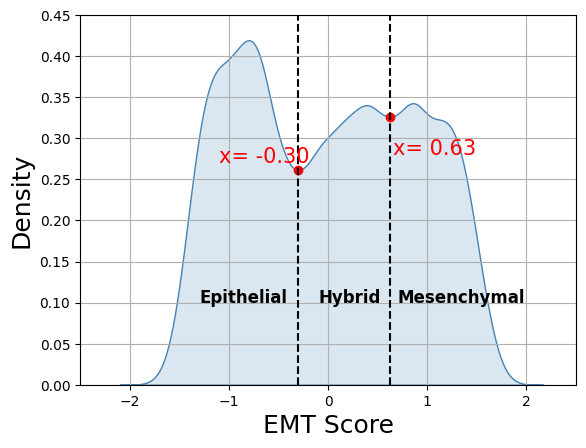

Local minima occur at: [-0.30126339  0.62556324]


In [9]:
# KDE Plot
sns.kdeplot(exp_data['EMT_score'], fill=True, color="steelblue", alpha=0.2)
plt.xlabel('EMT_score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['EMT_score'])
x_vals = np.linspace(exp_data['EMT_score'].min(), exp_data['EMT_score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

# Plot minima points
plt.scatter(minima_values, kde(minima_values), color='red', label='Local Minima')
plt.axvline(x = 0.62556324, linestyle = "--", color = "black")
plt.axvline(x = -0.30126339, linestyle = "--", color = "black")

plt.text(-1.3, 0.1, "Epithelial", fontsize = 12, color = "black", fontweight = "bold")
plt.text(0.70, 0.1, "Mesenchymal", fontsize = 12, color = "black", fontweight = "bold")
plt.text(-0.10, 0.1, "Hybrid", fontsize = 12, color = "black", fontweight = "bold")
plt.text(-1.1, 0.27,  "x= -0.30", fontsize = 15, color = "red")
plt.text(0.65, 0.28, "x= 0.63", fontsize = 15, color = "red")

# plt.legend()?
plt.xlim(-2.5, 2.5)
plt.ylim(0, 0.45)
plt.grid(True)
plt.ylabel('Density', fontsize=18)
plt.xlabel('EMT Score', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [10]:
for i in range(len(exp_data.index)):
    if exp_data.loc[i, "EMT_score"] > 0.62556324:
        exp_data.loc[i, "EMT_label"] = "Mesenchymal"
    elif exp_data.loc[i, "EMT_score"] < -0.30126339:
        exp_data.loc[i, "EMT_label"] = "Epithelial"
    else:
        exp_data.loc[i, "EMT_label"] = "Hybrid"

In [11]:
exp_data["EMT_label"].value_counts()

EMT_label
Epithelial     29522
Mesenchymal    21114
Hybrid         20575
Name: count, dtype: int64

In [12]:
minima_values

array([-0.30126339,  0.62556324])

In [13]:
minima_values[1:]

array([0.62556324])

### Analysis stemness

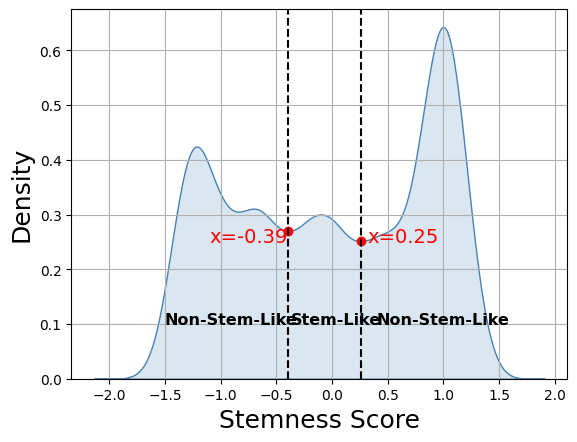

Local minima occur at: [-0.84055349 -0.39114151  0.25684787]


In [14]:
# KDE Plot
sns.kdeplot(exp_data['SN_score'], fill=True, color="steelblue", alpha=0.2)
plt.xlabel('Stemness_score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['SN_score'])
x_vals = np.linspace(exp_data['SN_score'].min(), exp_data['SN_score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

# Plot minima points
plt.scatter(minima_values[1:], kde(minima_values[1:]), color='red', label='Local Minima')
plt.axvline(x = 0.25684787, linestyle = "--", color = "black")
plt.axvline(x = -0.39114151, linestyle = "--", color = "black")
plt.text(-1.5, 0.10, "Non-Stem-Like", fontsize = 11.5, color = "black", fontweight = "bold")
plt.text(0.4, 0.10, "Non-Stem-Like", fontsize = 11.5, color = "black", fontweight = "bold")
plt.text(-0.37, 0.10, "Stem-Like", fontsize = 11.5, color = "black", fontweight = "bold")
plt.text(-1.1, 0.25, "x=-0.39", fontsize = 14, color = "red")
plt.text(0.32, 0.25, "x=0.25", fontsize = 14, color = "red")
# plt.legend()
plt.grid(True)
plt.xlabel('Stemness Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [15]:
for i in range(len(exp_data.index)):
    if exp_data.loc[i, "SN_score"] > 0.25684787:
        exp_data.loc[i, "SN_label"] = "Non-stem-like"
    elif exp_data.loc[i, "SN_score"] < -0.39114151:
        exp_data.loc[i, "SN_label"] = "Non-stem-like"
    else:
        exp_data.loc[i, "SN_label"] = "Stem-like"

### Analysis Glycolysis

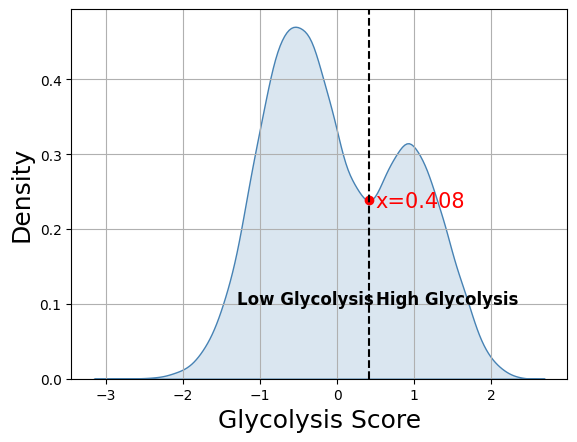

Local minima occur at: [0.40870696]


In [16]:
# KDE Plot
sns.kdeplot(exp_data['Glycolysis_score'], fill=True, color="steelblue", alpha=0.2)
plt.xlabel('Glycolysis_score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['Glycolysis_score'])
x_vals = np.linspace(exp_data['Glycolysis_score'].min(), exp_data['Glycolysis_score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

# Plot minima points
plt.scatter(minima_values, kde(minima_values), color='red', label='Local Minima')
plt.axvline(x = 0.40870696, linestyle = "--", color = "black")
plt.text(-1.3, 0.10, "Low Glycolysis", fontsize = 12, color = "black", fontweight='bold')
plt.text(0.5, 0.10, "High Glycolysis", fontsize = 12, color = "black", fontweight='bold')
plt.text(0.5, 0.23, "x=0.408", fontsize = 15, color = "red")
# plt.legend()
plt.grid(True)
plt.xlabel('Glycolysis Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [17]:
exp_data["Gly_label"] = ["high_glyc" if x > 0.40870696 else "low_glyc" for x in exp_data["Glycolysis_score"]]

### Analysis OxPhos

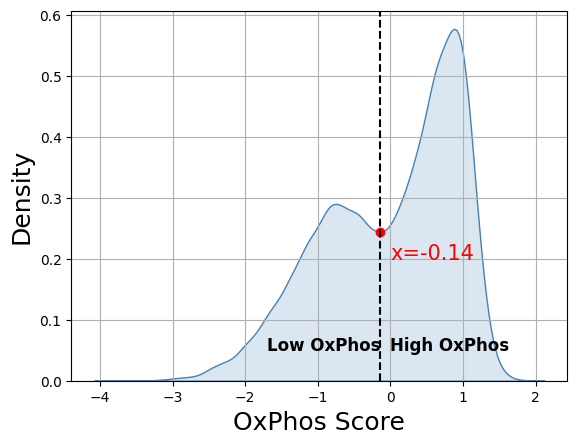

Local minima occur at: [-3.56278376 -0.14397881]


In [18]:
# KDE Plot
sns.kdeplot(exp_data['OxPhos_score'], fill=True, color="steelblue", alpha=0.2)
plt.xlabel('OxPhos_score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['OxPhos_score'])
x_vals = np.linspace(exp_data['OxPhos_score'].min(), exp_data['OxPhos_score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

# Plot minima points
plt.scatter(minima_values[1:], kde(minima_values[1:]), color='red', label='Local Minima')
plt.axvline(x = -0.14397881, linestyle = "--", color = "black")
plt.text(-1.7, 0.05, "Low OxPhos", fontsize = 12, color = "black", fontweight = "bold")
plt.text(0.0, 0.05, "High OxPhos", fontsize = 12, color = "black", fontweight = "bold")
plt.text(0.0, 0.2, "x=-0.14", fontsize = 15, color = "red")
plt.grid(True)
plt.xlabel('OxPhos Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [19]:
exp_data["OxP_label"] = ["high_OxP" if x > -0.14397881 else "low_OxP" for x in exp_data["OxPhos_score"]]

### Resistance Score

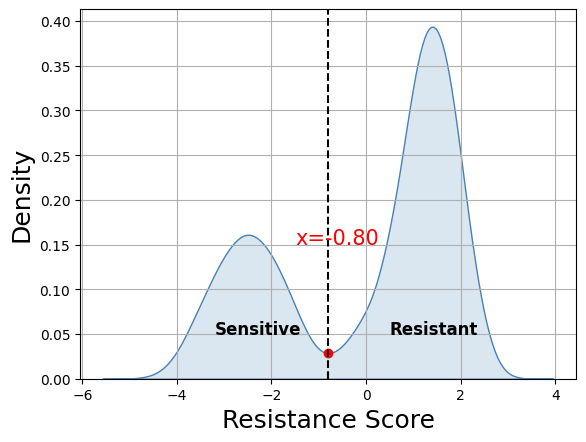

Local minima occur at: [-0.80023176]


In [20]:
# KDE Plot
sns.kdeplot(exp_data['Resistance score'], fill=True, color="steelblue", alpha=0.2)
plt.xlabel('Resistance score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['Resistance score'])
x_vals = np.linspace(exp_data['Resistance score'].min(), exp_data['Resistance score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

# Plot minima points
plt.scatter(minima_values, kde(minima_values), color='red', label='Local Minima')
plt.axvline(x = -0.80023176, linestyle = "--", color = "black")
plt.text(-3.2, 0.050, "Sensitive", fontsize = 12, color = "black", fontweight = "bold")
plt.text(0.50, 0.05, "Resistant", fontsize = 12, color = "black", fontweight = "bold")
plt.text(-1.5, 0.15, "x=-0.80", fontsize = 15, color = "red")
plt.grid(True)
plt.xlabel('Resistance Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [21]:
exp_data["Resistance label"] = ["Resistant" if x > -0.80023176 else "Sensitive" for x in exp_data["Resistance score"]]

### Luminal Analysis

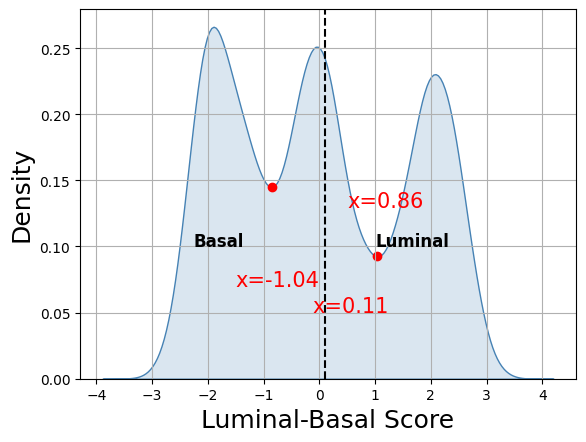

Local minima occur at: [-0.85764059  1.04176209]


In [22]:
# KDE Plot
sns.kdeplot(exp_data['Luminal-Basal Score'], fill=True, color="SteelBlue", alpha=0.2)
plt.xlabel('Luminal-Basal Score')
plt.ylabel('Density')

# Compute KDE
kde = gaussian_kde(exp_data['Luminal-Basal Score'])
x_vals = np.linspace(exp_data['Luminal-Basal Score'].min(), exp_data['Luminal-Basal Score'].max(), 1000)
density = kde(x_vals)

# Find local minima
minima_indices = argrelextrema(density, np.less)[0]
minima_values = x_vals[minima_indices]

plt.axvline(x = 0.10575283309962824, linestyle = "--", color = "black")
# plt.axvline(x = 0.85764059, linestyle = "--", color = "black")
plt.text(-2.25, 0.10, "Basal", fontsize = 12, color = "black", fontweight = "bold")
plt.text(1, 0.10, "Luminal", fontsize = 12, color = "black", fontweight = "bold")
plt.text(-0.13, 0.05, "x=0.11", fontsize = 15, color = "red")
plt.text(-1.5, 0.07, "x=-1.04", fontsize = 15, color = "red")
plt.text(0.5, 0.13, "x=0.86", fontsize = 15, color = "red")
# Plot minima points
plt.scatter(minima_values, kde(minima_values), color='red', label='Local Minima')
plt.grid(True)
plt.xlabel('Luminal-Basal Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.show()

# Print minima values
print("Local minima occur at:", minima_values)

In [23]:
import statistics

statistics.median(exp_data['Luminal-Basal Score'].values)

np.float64(-0.10575283309962824)

In [24]:
exp_data["lum_Basal_label"] = ["Basal" if x < -0.10575283309962824 else "Luminal" for x in exp_data['Luminal-Basal Score']]
exp_data["lum_Basal_label"].value_counts() 

lum_Basal_label
Luminal    35606
Basal      35605
Name: count, dtype: int64

In [25]:
list_EM = list(exp_data["EMT_label"].unique())
list_SN = list(exp_data["SN_label"].unique())
list_Gly = list(exp_data["Gly_label"].unique())
list_OxP = list(exp_data["OxP_label"].unique())
list_resistance = list(exp_data["Resistance label"].unique())
list_luminal_basal = list(exp_data["lum_Basal_label"].unique())

print(list_EM, list_SN, list_Gly, list_OxP, list_resistance, list_luminal_basal)

['Mesenchymal', 'Hybrid', 'Epithelial'] ['Non-stem-like', 'Stem-like'] ['low_glyc', 'high_glyc'] ['low_OxP', 'high_OxP'] ['Resistant', 'Sensitive'] ['Basal', 'Luminal']


In [26]:
list_phenotypes = list_EM + list_SN + list_Gly + list_OxP + list_resistance + list_luminal_basal
list_phenotypes

['Mesenchymal',
 'Hybrid',
 'Epithelial',
 'Non-stem-like',
 'Stem-like',
 'low_glyc',
 'high_glyc',
 'low_OxP',
 'high_OxP',
 'Resistant',
 'Sensitive',
 'Basal',
 'Luminal']